In [21]:
from audiofile_read import *
%pylab inline

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# numerical processing and scientific libraries
import numpy as np

# plotting
import matplotlib.pyplot as plt


# Rhythm Pattern Audio Extraction Library
from rp_extract import rp_extract
from rp_plot import *   # can be skipped if you don't want to do any plots


# misc
from urllib.request import urlopen
import urllib.request
import gzip
from io import StringIO
import math
import librosa
import librosa.display
from scipy.io.wavfile import write
import pandas as pd

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from math import*
from decimal import Decimal
from scipy.spatial import distance
 
class Similarity():
 
    """ Five similarity measures function """
 
    def euclidean_distance(self,x,y):
 
        """ return euclidean distance between two lists """
 
        return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
 
    def manhattan_distance(self,x,y):
 
        """ return manhattan distance between two lists """
 
        return sum(abs(a-b) for a,b in zip(x,y))
 
    def minkowski_distance(self,x,y,p_value):
 
        """ return minkowski distance between two lists """
 
        return self.nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),
           p_value)
 
    def nth_root(self,value, n_root):
 
        """ returns the n_root of an value """
 
        root_value = 1/float(n_root)
        return round (Decimal(value) ** Decimal(root_value),3)
 
    def cosine_similarity(self,x,y):
 
        """ return cosine similarity between two lists """
 
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = self.square_rooted(x)*self.square_rooted(y)
        return round(numerator/float(denominator),3)
 
    def square_rooted(self,x):
 
        """ return 3 rounded square rooted value """
 
        return round(sqrt(sum([a*a for a in x])),3)

    def cosine_distance(self, x, y):
        
        return distance.cosine(x, y)
 
    def jaccard_similarity(self,x,y):
 
        """ returns the jaccard similarity between two lists """
 
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)
    
    def overall_score(self, x, y):
        
        return (self.manhattan_distance(x, y)+self.euclidean_distance(x,y)) * self.cosine_distance(x,y)
        

In [56]:
audiofile_match1 = "../../Matches/12/117---Ini Kamoze - Here Comes The Hotstepper (HQ)-extract.mp3"
audiofile_match2 = "../../Matches/12/117---Heartbeat-extract.mp3"

In [63]:
def rp_histo_curve_fitting_plot(audiofile1, audiofile2):
    measure = Similarity()
    counter = 0
    distances = []
    samplerate_match1, samplewidth_match1, wavedata_match1 = audiofile_read(audiofile1)
    samplerate_match2, samplewidth_match2, wavedata_match2 = audiofile_read(audiofile2)

    features_match1 = rp_extract(wavedata_match1,                            # the two-channel wave-data of the audio-file
                                samplerate_match1,                          # the samplerate of the audio-file
                                extract_rh          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,                       # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             
    features_match2 = rp_extract(wavedata_match2,                            # the two-channel wave-data of the audio-file
                                samplerate_match2,                          # the samplerate of the audio-file
                                extract_rh          = True,          # <== extract this feature!    
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)
    
    for x in features_match1["rh"]:
        dist = abs(x - features_match2["rh"][counter])
        distances.append(dist)
        counter += 1
    np_distances = np.array(distances)
    avg_distance = np.mean(np_distances)
    
    if np.meanfeatures_match1["rh"][0] < features_match2["rh"][0]:
        features_match1_fit = features_match1["rh"] + avg_distance
    else:
        features_match1_fit = features_match1["rh"] - avg_distance
    
    plt.plot(features_match1_fit)
    plt.plot(features_match2["rh"])

    print("Overall-Score: ", measure.overall_score(features_match1_fit, features_match2["rh"]))

Decoded .mp3 with: ffmpeg -v 1 -y -i ../../Matches/12/117---Ini Kamoze - Here Comes The Hotstepper (HQ)-extract.mp3 C:\Users\AlexEitl\AppData\Local\Temp\a128a2aa-1901-433d-bf35-e88428b1873c.wav
48000 Hz, 2 channel(s), 961391 samples
Resampling to 44100 ...
Decoded .mp3 with: ffmpeg -v 1 -y -i ../../Matches/12/117---Heartbeat-extract.mp3 C:\Users\AlexEitl\AppData\Local\Temp\7ab44e0d-947c-498e-b178-a47df6c9991a.wav
48000 Hz, 2 channel(s), 961391 samples
Resampling to 44100 ...
Overall-Score:  61.411024851682065


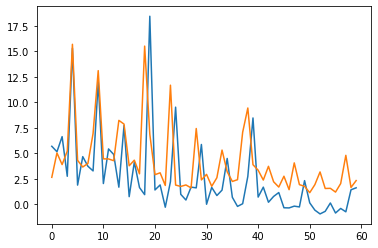

In [64]:
rp_histo_curve_fitting_plot(audiofile_match1, audiofile_match2)